In [2]:
## import libraries
import os, sys
import yaml
import xarray as xr
import pandas as pd
import numpy as np
import metpy.calc as mpcalc
from metpy.units import units
from datetime import datetime, timedelta

%matplotlib inline

sys.path.append('../modules')
import ar_funcs

In [3]:
path_to_data = '/data/projects/Comet/cwp140/data/'      # project data -- read only
path_to_out  = '../out/'       # output files (numerical results, intermediate datafiles) -- read & write
path_to_figs = '../figs/'      # figures

In [13]:
## read AR duration file
duration_df = pd.read_csv('../out/AR_track_duration_SEAK.csv')
duration_df['start_date'] = pd.to_datetime(duration_df['start_date'])
duration_df['end_date'] = pd.to_datetime(duration_df['end_date'])

start_date = duration_df.iloc[-1]['start_date']
end_date = duration_df.iloc[-1]['end_date']+ pd.Timedelta(hours=12)
print(start_date, end_date)

2019-08-26 18:00:00 2019-08-27 18:00:00


In [5]:
## load the precipitation datasets 
fname = '/home/dnash/comet_data/downloads/mesowest/PAGY.2019-12-31.csv'
prec_df = pd.read_csv(fname, skiprows=12, names=['station_ID', 'date_time', 'prec_1h', 'prec_3h', 'prec_6h', 'prec24h'])
prec_df['date_time'] = pd.to_datetime(prec_df['date_time']).dt.tz_localize(None)
prec_df = prec_df.set_index(['date_time'])
prec_df

,station_ID,prec_1h,prec_3h,prec_6h,prec24h
date_time,,,,,
2002-11-05 20:50:00,PAGY,0.0,0.508,NaN,NaN
2002-11-05 21:50:00,PAGY,0.0,NaN,NaN,NaN
2002-11-05 22:50:00,PAGY,0.0,NaN,NaN,NaN
2002-11-05 23:45:00,PAGY,NaN,NaN,NaN,NaN
2002-11-05 23:50:00,PAGY,0.0,NaN,0.508,NaN
...,...,...,...,...,...
2019-12-31 22:50:00,PAGY,NaN,NaN,NaN,NaN
2019-12-31 22:51:00,PAGY,NaN,NaN,NaN,NaN
2019-12-31 22:53:00,PAGY,NaN,NaN,NaN,NaN


In [15]:
df

,station_ID,prec_1h,prec_3h,prec_6h,prec24h
date_time,,,,,
2019-08-26 18:05:00,PAGY,NaN,NaN,NaN,NaN
2019-08-26 18:10:00,PAGY,NaN,NaN,NaN,NaN
2019-08-26 18:15:00,PAGY,NaN,NaN,NaN,NaN
2019-08-26 18:20:00,PAGY,NaN,NaN,NaN,NaN
2019-08-26 18:25:00,PAGY,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-08-27 17:45:00,PAGY,NaN,NaN,NaN,NaN
2019-08-27 17:50:00,PAGY,NaN,NaN,NaN,NaN
2019-08-27 17:53:00,PAGY,NaN,NaN,3.048,NaN


In [14]:
## loop through each row in the AR duration df
idx = (prec_df.index >= start_date) & (prec_df.index <= end_date)
df = prec_df.loc[idx]
df
## pull out the total accumulated preciptiation
accum_prec = df['prec_1h'].sum()
print(accum_prec)
## pull peak 1h precip rate for duration of event
peak_1hr = df['prec_1h'].max()
print(peak_1hr)
## pull peak 3h precip rate for duration of event
peak_3hr = df['prec_1h'].resample('3H').sum().max()
print(peak_3hr)
## pull peak 6h precip rate for duration of event
peak_6hr = df['prec_1h'].resample('6H').sum().max()
print(peak_6hr)
## pull peak 12h precip rate for duration of event
peak_12hr = df['prec_1h'].resample('12H').sum().max()
print(peak_12hr)
## pull peak 24h precip rate for duration of event
peak_24hr = df['prec_1h'].resample('24H').sum().max()
print(peak_24hr)

140.562
5.08
93.472
115.595
122.732
140.562


<AxesSubplot:xlabel='date_time'>

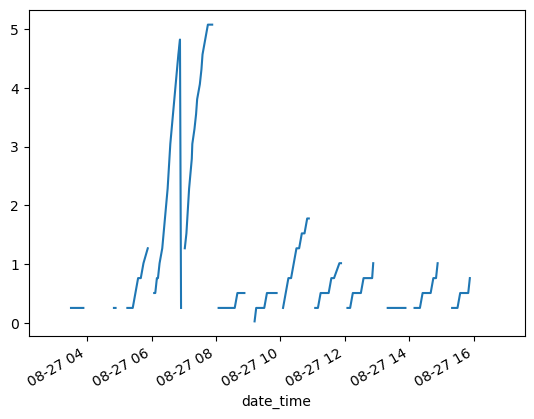

In [10]:
df.prec_1h.plot()

<AxesSubplot:xlabel='date_time'>

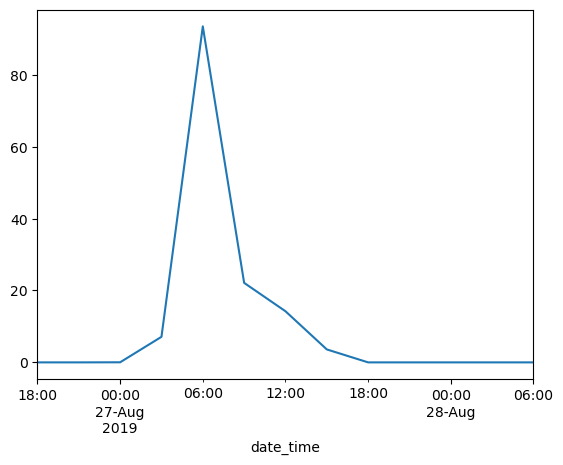

In [7]:
df.prec_1h.resample('3H').sum().plot()

<AxesSubplot:xlabel='date_time'>

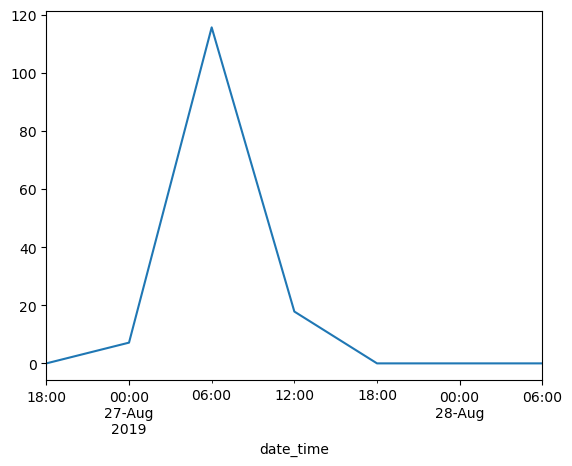

In [11]:
df.prec_1h.resample('6H').sum().plot()

In [26]:
prec_df.describe()

,prec_1h,prec_3h,prec_6h,prec24h
count,82574.000000,6184.000000,8159.000000,2524.000000
mean,0.336560,0.640171,0.993782,4.319912
std,0.528214,1.342412,2.147550,5.841492
min,0.000000,0.000000,0.000000,0.254000
25%,0.025000,0.025000,0.025000,0.762000
50%,0.254000,0.025000,0.025000,2.032000
75%,0.508000,0.508000,1.016000,5.334000
max,12.446000,17.780000,24.638000,52.324000
